<a href="https://colab.research.google.com/github/MasterWitcher22/Food-Delivery-App/blob/main/Customer%20Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mall Customer Segmentation  in Python***

Unsupervised Learning Project
Contents

1.Introduction

2.Goal of The Project

3.General View of Data

4.Clustering Algorithms

5.Comparison of Results


1. **Introduction**

Unlike Supervised Learning, Unsupervised learning has only independent variables and no corresponding target variable. Shortly, the data is unlabeled. The aim of unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.


2. **Goal of the Project**

We are going to aim to cluster a data set that is about behaviour of the customers shopping from a mall.

Our research question is "Which clustering algorithm is best to cluster our dataset?"


3. **General View of Data**

The data set has 200 customers.

Features

Customer Id - All the id's of the customers who has shopped from the mall

Gender - Customer's gender

Age-Customer's age

Annual Income-The annnual income of customers

Spending Score-The amount that the customer has spent 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics
from sklearn import preprocessing

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Data Collection & Analysis

  Loading the data into pandas data frame.

  

In [4]:
df=pd.read_csv("gdrive/My Drive/Mall_Customers.csv")
df.head() #first 5 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.last


<bound method NDFrame.last of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
print('This data set has {} rows and {} columns.\n'.format(df.shape[0],df.shape[1]))
df.info()

This data set has 200 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum() # checking for missing values


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [9]:
X = df.iloc[:,[3,4]].values

In [10]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [11]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

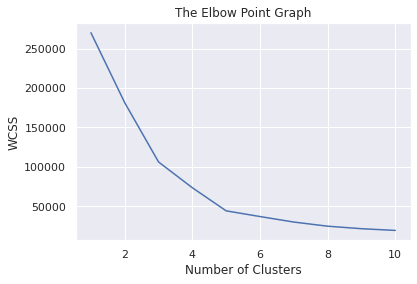

In [12]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [14]:
# There are lots of outliers in columns but we will not apply winsorize or another methods to them.Because we may have information loss.
# They may represent another clusters.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()

Age                       0
Annual Income (k$)        2
CustomerID                0
Gender                    0
Spending Score (1-100)    0
dtype: int64

In [15]:
df=df.drop('Gender',axis=1)

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
scaler=StandardScaler()
df_scl=scaler.fit_transform(df)

# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
norm=normalize(df_scl) 

 #We can apply both (StandartScaler and Normalize) on our data before clustering.
df_norm=pd.DataFrame(norm)

5. **Clustering Algorithms**

  5.1 K-Means

  

**K-means clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

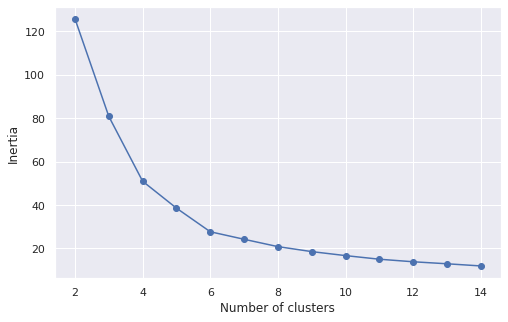

In [18]:
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Elbow point graph**

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow.

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [19]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.495 
Silhouette score for 6 clusters k-means : 0.52 
Silhouette score for 7 clusters k-means : 0.491 
Silhouette score for 8 clusters k-means : 0.486 
Silhouette score for 9 clusters k-means : 0.468 
Silhouette score for 10 clusters k-means : 0.467 


In [20]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.495 
Silhouette score for 6 clusters k-means : 0.52 
Silhouette score for 7 clusters k-means : 0.491 
Silhouette score for 8 clusters k-means : 0.486 
Silhouette score for 9 clusters k-means : 0.468 
Silhouette score for 10 clusters k-means : 0.467 


 Davies Bouldin that is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The minimum score is zero, with lower values indicating better clustering.

In [21]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin Score:0.677
Davies Bouldin Score:0.762
Davies Bouldin Score:0.766


In [22]:
kmeans_labels=KMeans(n_clusters=7,random_state=123).fit_predict(df_norm)

<Figure size 2700x1260 with 0 Axes>

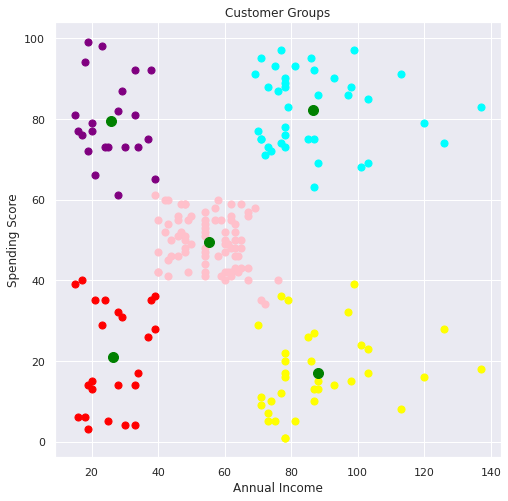

In [23]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='cyan', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='red', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='green', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

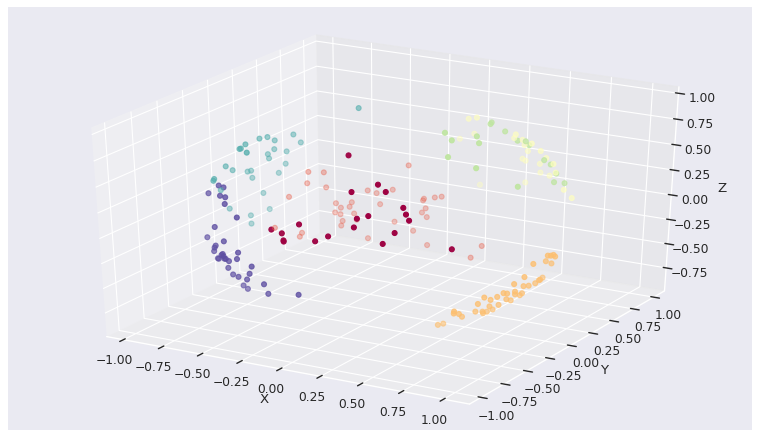

In [24]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

# **Hierarchical Clustering Algorithm**

Hierarchical cluster analysis or HCA is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

The algorithm groups similar objects into groups called clusters. The endpoint is a set of clusters or groups, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

# Agglomerative Hierarchical Clustering

The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). It's a “bottom-up” approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

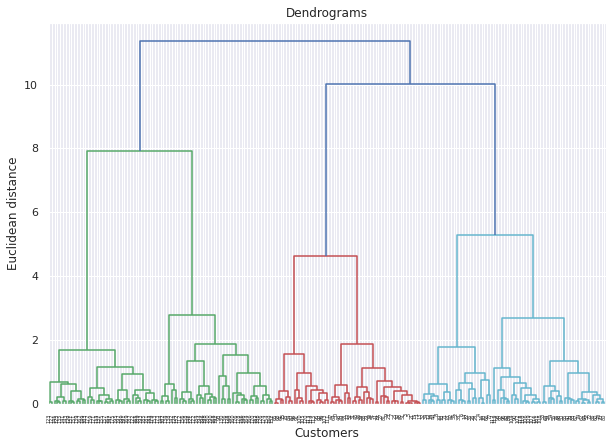

In [25]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')  
dend = shc.dendrogram(shc.linkage(df_norm, method='ward'))

#The x-axis contains the samples and y-axis represents the distance between these samples. 
#The vertical line with maximum distance is the blue line and hence we can decide a threshold of 38 and cut the dendrogram.

#There are three clusters according to the dendogram.

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.


As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.


In this case, it's 3. So let's fit our Agglomerative model with 3 clusters.

In [26]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcp=hcluster.fit_predict(df_norm)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(df_norm,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,hcp)))

Silhouette Score for Hieararchial Clustering:0.40670074551972674
Davies Bouldin Score:0.9544396900216355


# Scores:





> Silhouette Score : 0.40670074551972674

> Davies Bouldin Score: 0.9544396900216355 





# Lets Visualize the results :

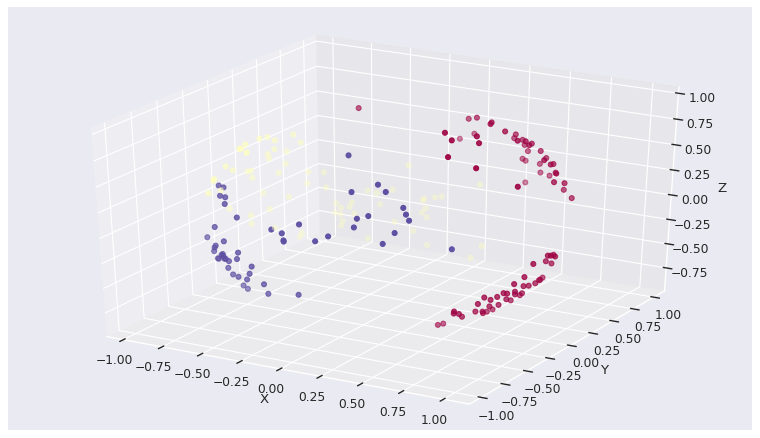

In [27]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=hcp,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

# Now, Let's visualize the dataset in three-dimensional space.

# Downsides :


> Hierarchical clustering is a very useful way of segmentation. However, it doesn't work well when we have huge amount of data. Hierarchical clustering can easily lead to dendrograms that are just plain wrong. Unless you known your data inside out (pretty much impossible for big data sets), this is largely unavoidable. One of the main reasons for this is that the clustering algorithm will work even on the most unsuitable data. Another reason is that the decision you make for creating clusters (Step 2 above) can lead to significantly different dendrograms. The choice can be tough to make in advance, and you may not be able to tell which of the four end results are the most suitable.



## Algorithms Used :

In [28]:

algorithms=["K-Means","Hierarchical Clustering"]

# Silhouette Score
ss=[metrics.silhouette_score(df_norm,kmeans_labels),metrics.silhouette_score(df_norm,hcp)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(df_norm,kmeans_labels),metrics.davies_bouldin_score(df_norm,hcp)]
  

# ***Comparison***

In [29]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

,Algorithms,Davies Bouldin,Silhouette Score
0,K-Means,0.761513,0.490775
1,Hierarchical Clustering,0.954440,0.406701
